In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from fredapi import Fred
import yfinance as yfin
import datetime
import seaborn as sns
import math

a. Find the 30 largest holdings.

In [2]:
file_path = r"C:\Users\kaleu\Desktop\WQU\GWP_Q4\holdings-daily-us-en-xlre.xlsx"
# Data Source : https://www.ssga.com/us/en/intermediary/etfs/the-real-estate-select-sector-spdr-fund-xlre

df = pd.read_excel(file_path, header=4)
df_first_30 = df.iloc[:30].dropna(axis =1)

df_first_30

#Get the ticker for the 30 largest holdings
df_first_30_Ticker = df_first_30['Ticker']
df_first_30_Ticker = df_first_30_Ticker.replace('BRK.B', 'BRK-B')
ticker_list = df_first_30_Ticker.tolist()

print(f"30 largest holdings constitute {round(sum(df_first_30['Weight']), 2)}% of total holdings")

df_first_30

30 largest holdings constitute 98.71% of total holdings


,Name,Ticker,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,WELLTOWER INC,WELL,95040Q104,BYVYHH4,9.384768,-,4243334.0,USD
1,PROLOGIS INC,PLD,74340W103,B44WZD7,8.586141,-,5887992.0,USD
2,AMERICAN TOWER CORP,AMT,03027X100,B7FBFL2,7.412666,-,2970820.0,USD
3,EQUINIX INC,EQIX,29444U700,BVLZX12,6.261034,-,620876.0,USD
4,SIMON PROPERTY GROUP INC,SPG,828806109,2812452,4.872271,-,2071385.0,USD
5,REALTY INCOME CORP,O,756109104,2724193,4.529904,-,5881857.0,USD
6,DIGITAL REALTY TRUST INC,DLR,253868103,B03GQS4,4.489490,-,2033956.0,USD
7,PUBLIC STORAGE,PSA,74460D109,2852533,4.372565,-,1211237.0,USD
8,CBRE GROUP INC A,CBRE,12504L109,B6WVMH3,4.329108,-,2150272.0,USD
9,CROWN CASTLE INC,CCI,22822V101,BTGQCX1,4.189974,-,3461225.0,USD


b. Get at least 6 months of data (~ 120 data points).

In [3]:
#Reference :M2L2 

# Starting and end dates
start = datetime.date(2025, 3, 20)
end = datetime.date(2025, 9, 23)

# Get data
df = yfin.download(ticker_list, start, end, auto_adjust = False)['Adj Close']

# Display the first five rows
df.head()

[*********************100%***********************]  30 of 30 completed


Ticker,AMT,ARE,AVB,BXP,CBRE,CCI,CPT,CSGP,DLR,DOC,...,PLD,PSA,REG,SBAC,SPG,UDR,VICI,VTR,WELL,WY
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-20,210.861893,93.920273,207.970901,66.514580,130.130005,102.325401,117.920776,79.019997,149.306305,19.666790,...,110.029175,290.504517,70.643433,218.821167,160.407822,42.727081,31.145216,66.724068,146.559662,29.625479
2025-03-21,212.790695,93.232666,206.063278,66.388290,129.779999,104.086433,117.095673,78.459999,148.290619,19.357533,...,106.445641,285.272125,70.113899,219.484634,158.115585,42.452942,30.678185,65.876587,145.201996,28.710445
2025-03-24,209.415268,94.472290,210.783173,67.495735,133.869995,102.051460,119.472748,80.139999,153.329620,19.763433,...,108.252136,288.985748,71.035683,216.563339,162.036774,43.383068,31.106297,67.216789,148.492126,29.084328
2025-03-25,206.167755,92.951820,209.111557,66.553436,133.770004,98.275047,119.079849,80.230003,149.316147,19.483170,...,107.240891,283.322235,70.780724,212.225922,161.685623,43.157879,30.785212,66.645233,146.837158,28.730124
2025-03-26,206.679474,93.097084,210.517685,66.951729,132.619995,98.901184,120.042465,80.370003,147.324219,19.628130,...,109.106285,285.664062,71.418129,212.612122,164.309509,43.422230,31.038189,67.187225,148.502045,28.946581


c. Compute the daily returns.

In [4]:
daily_returns = df.pct_change().dropna()
daily_returns

Ticker,AMT,ARE,AVB,BXP,CBRE,CCI,CPT,CSGP,DLR,DOC,...,PLD,PSA,REG,SBAC,SPG,UDR,VICI,VTR,WELL,WY
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-21,0.009147,-0.007321,-0.009173,-0.001899,-0.002690,0.017210,-0.006997,-0.007087,-0.006803,-0.015725,...,-0.032569,-0.018011,-0.007496,0.003032,-0.014290,-0.006416,-0.014995,-0.012701,-0.009264,-0.030887
2025-03-24,-0.015863,0.013296,0.022905,0.016681,0.031515,-0.019551,0.020300,0.021412,0.033981,0.020969,...,0.016971,0.013018,0.013147,-0.013310,0.024800,0.021910,0.013955,0.020344,0.022659,0.013023
2025-03-25,-0.015508,-0.016094,-0.007930,-0.013961,-0.000747,-0.037005,-0.003289,0.001123,-0.026175,-0.014181,...,-0.009342,-0.019598,-0.003589,-0.020028,-0.002167,-0.005191,-0.010322,-0.008503,-0.011145,-0.012179
2025-03-26,0.002482,0.001563,0.006724,0.005985,-0.008597,0.006371,0.008084,0.001745,-0.013340,0.007440,...,0.017394,0.008266,0.009005,0.001820,0.016228,0.006125,0.008217,0.008132,0.011338,0.007534
2025-03-27,0.019141,-0.004369,-0.004437,-0.008706,-0.008294,0.014838,-0.002209,-0.002986,-0.029786,-0.004431,...,-0.003419,0.001303,-0.006042,0.007825,-0.015435,-0.003157,-0.000627,-0.003080,0.000467,0.005778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-16,0.011584,0.002104,-0.002904,0.014394,-0.016429,0.000000,-0.011535,-0.009441,-0.006741,-0.001096,...,0.006799,-0.006107,-0.008313,0.005706,-0.012190,-0.011917,-0.013301,-0.025483,-0.021963,0.004835
2025-09-17,0.012787,-0.007114,0.001352,-0.031674,0.009150,0.013145,-0.006068,-0.002950,-0.015587,-0.001097,...,-0.001228,-0.002388,-0.008809,0.001004,0.000220,0.000000,-0.001226,-0.010724,0.004237,-0.018043
2025-09-18,-0.021245,0.027132,0.005661,0.017271,0.008519,-0.019409,0.007983,0.015819,0.001227,0.019769,...,0.011151,-0.001197,0.008171,-0.002809,-0.008097,-0.000536,-0.000933,0.009356,0.003737,0.002042


d. Compute the covariance matrix.

In [5]:
daily_returns_cov = daily_returns.cov()

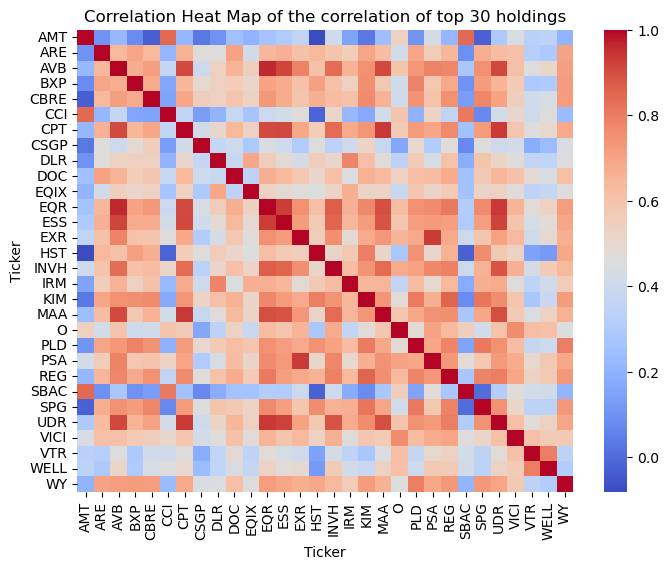

In [6]:
#Further analysis on the heatmap for correlation matrix
daily_returns_corr = daily_returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(daily_returns_corr, annot=False, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heat Map of the correlation of top 30 holdings')
plt.show()

e. Compute the PCA.

In [7]:
 #Standardize the matrix

daily_returns_means = daily_returns.mean()
daily_returns_stds = daily_returns.std()


standardized_data = (daily_returns - daily_returns_means) / daily_returns_stds
std_data_cov = standardized_data.cov()

eigenvalues_PCA, eigenvectors_PCA = LA.eig(std_data_cov)

sorted_indices = np.argsort(eigenvalues_PCA)[::-1]
eigenvalues_PCA = eigenvalues_PCA[sorted_indices]
eigenvectors_PCA = eigenvectors_PCA[:, sorted_indices]

# Put data into a DataFrame
df_eigval_PCA = pd.DataFrame({"Eigenvalues":eigenvalues_PCA}, index=range(1,31))

# Work out explained proportion
df_eigval_PCA["Explained proportion"] = df_eigval_PCA["Eigenvalues"] / np.sum(df_eigval_PCA["Eigenvalues"])
df_eigval_PCA["Cumulative explained proportion"] = df_eigval_PCA["Explained proportion"].cumsum()

#Format as percentage
df_eigval_PCA.style.format({
    "Explained proportion": "{:.2%}",
    "Cumulative explained proportion": "{:.2%}"
})

,Eigenvalues,Explained proportion,Cumulative explained proportion
1,17.426312,58.09%,58.09%
2,3.514057,11.71%,69.80%
3,1.275606,4.25%,74.05%
4,1.168616,3.90%,77.95%
5,1.109115,3.70%,81.65%
6,0.779281,2.60%,84.24%
7,0.565793,1.89%,86.13%
8,0.462743,1.54%,87.67%
9,0.434801,1.45%,89.12%
10,0.386216,1.29%,90.41%


Produce a screeplot of the variance explained for each component.

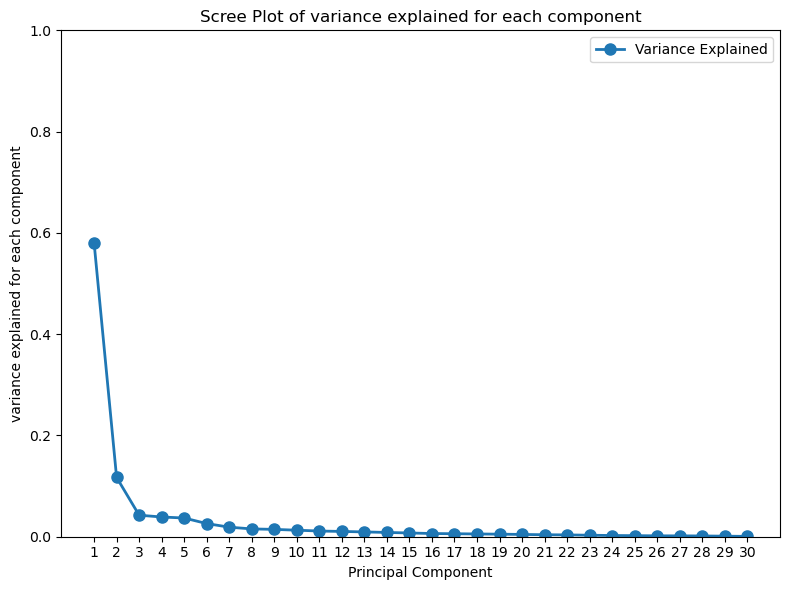

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(df_eigval_PCA.index, df_eigval_PCA["Explained proportion"], 'o-', markersize=8, linewidth=2, label='Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('variance explained for each component')
plt.title('Scree Plot of variance explained for each component')
plt.xticks(df_eigval_PCA.index)
plt.legend()
plt.tight_layout()
plt.ylim(0, 1)
# Display the plot
plt.show()

74% of total variance will be explained by first 3 PC, if we want to explain 80% of the variance we could select the top 5 PCs  
If we want more than 90% of explained variance , we can include top 10 PCs, after that the increment are extremely immaterial.

f. Compute the SVD.

In [9]:
#Reference : M3L4

standardized_returns_dvd_sqrt_n=(standardized_data/math.sqrt(len(standardized_data)-1))

# Use SVD to calculate eigenvectors and eigenvalues of the covariance matrix of standardized returns

U_st_return, s_st_return, VT_st_return = np.linalg.svd(standardized_returns_dvd_sqrt_n)

eigenvalues_SVD = s_st_return**2
eigenvectors_SVD = VT_st_return.T

# Put data into a DataFrame
df_eigval_SVD = pd.DataFrame({"Eigenvalues":eigenvalues_PCA}, index=range(1,31))

# Work out explained proportion
df_eigval_SVD["Explained proportion"] = df_eigval_SVD["Eigenvalues"] / np.sum(df_eigval_SVD["Eigenvalues"])
df_eigval_SVD["Cumulative explained proportion"] = df_eigval_SVD["Explained proportion"].cumsum()


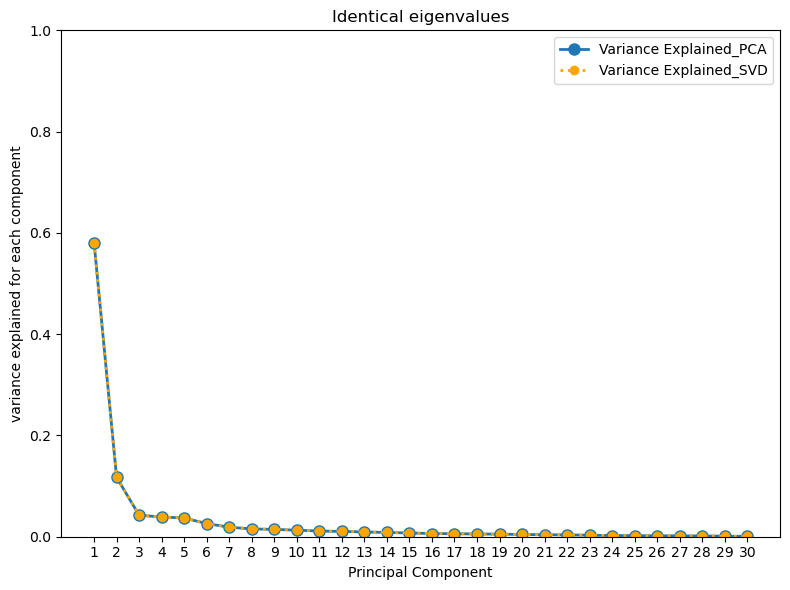

In [10]:
plt.figure(figsize=(8, 6))

plt.plot(df_eigval_PCA.index, df_eigval_PCA["Explained proportion"], 'o-', markersize=8, linewidth=2, label='Variance Explained_PCA')
plt.plot(df_eigval_SVD.index, df_eigval_SVD["Explained proportion"], 'o:', color = 'orange', markersize=6, linewidth=2, label='Variance Explained_SVD')

plt.xlabel('Principal Component')
plt.ylabel('variance explained for each component')
plt.title('Identical eigenvalues')
plt.xticks(df_eigval_SVD.index)
plt.legend()
plt.tight_layout()
plt.ylim(0, 1)
# Display the plot
plt.show()

In [11]:
# Compare the eigenvectors

differences = []
for i in range(len(eigenvectors_SVD)):
    difference = set([round(num, 4) for num in (eigenvectors_SVD/eigenvectors_PCA)[i]])
    differences.append(difference)

array = np.array([[d.pop(), d.pop()] for d in differences])


Text(0.5, 1.0, 'Eigenvector Ratios vs Principal Components: only sign different')

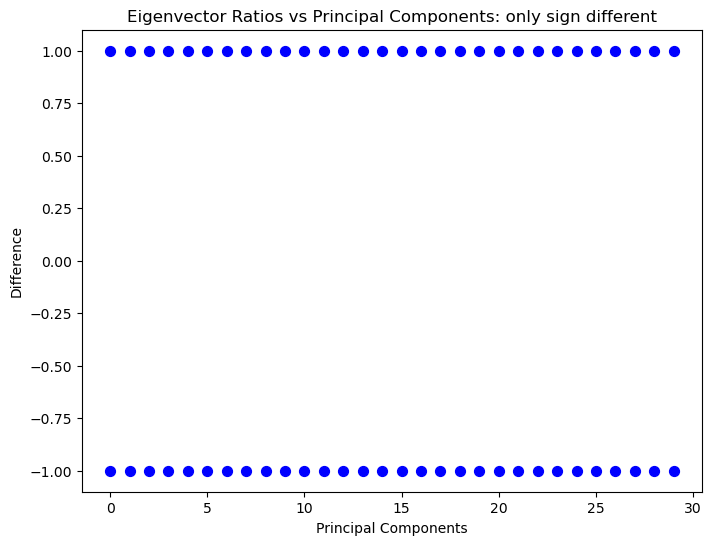

In [12]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
for x in range(len(differences)):
    for j in range(len(array[x])):
        plt.scatter(x, array[x][j], color='blue', s=50)
plt.xlabel('Principal Components')
plt.ylabel('Difference')
plt.title('Eigenvector Ratios vs Principal Components: only sign different')